## Observations and Insights

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

In [3]:
# Combine the data into a single dataset
mouse_merge_pd = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
mouse_merge_pd.head(50)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


## Summary statistics

In [4]:
# groupby Drug name & tumor volume to perform calculations
tumor_stat = mouse_merge_pd.groupby("Drug Regimen")["Tumor Volume (mm3)"]
# tumor_stat.describe()

In [5]:
# find mean for each drug using new table
tumor_mean = mouse_merge_pd.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()

In [6]:
# find median for each drug using new table
tumor_median = mouse_merge_pd.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()

In [7]:
# find variance for each drug using new table
tumor_var = mouse_merge_pd.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()

In [8]:
# find standard deviation for each drug using new table
tumor_std = mouse_merge_pd.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()

In [9]:
# find SEM for each drug using new table
tumor_SEM = mouse_merge_pd.groupby("Drug Regimen")["Tumor Volume (mm3)"].apply(st.sem)

In [10]:
tumor_analysis = pd.DataFrame({"Mean Tumor Volume": tumor_mean,
                             "Median Tumor Volume": tumor_median,
                              "Tumor Volume Variance": tumor_var,
                              "Tumor Volume Std. Dev.": tumor_std,
                              "Tumor Volume Std. Err.": tumor_SEM})
tumor_analysis

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

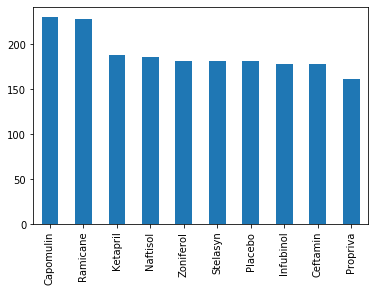

In [11]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
mouse_merge_pd['Drug Regimen'].value_counts().plot(kind='bar');

In [32]:
treatment_group = mouse_merge_pd.groupby('Drug Regimen')

treatment_count = treatment_group['Drug Regimen'].count()
# treatment_count
# treatment_sort = treatment_count.sort_values(by = 'Drug Regimen', ascending=[True])

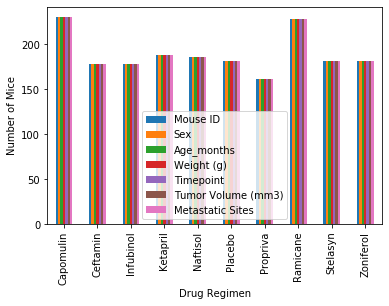

<Figure size 432x288 with 0 Axes>

In [34]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
treatment_chart = treatment_group.count().sort_index(ascending=True).plot(kind='bar')

treatment_chart.set_xlabel("Drug Regimen")
treatment_chart.set_ylabel("Number of Mice")

plt.show()
plt.tight_layout()

## Pie plots

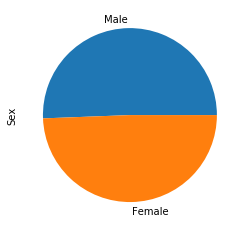

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_merge_pd['Sex'].value_counts().plot(kind='pie');

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_group = mouse_merge_pd.groupby('Sex')

sex_count = sex_group['Sex'].count()
sex_count 

Sex
Female    935
Male      958
Name: Sex, dtype: int64

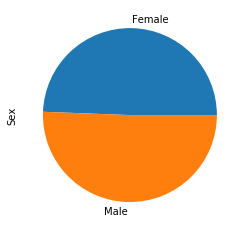

<Figure size 432x288 with 0 Axes>

In [16]:
sex_chart = sex_count.plot(kind='pie')

plt.show()
plt.tight_layout()

## Quartiles, outliers and boxplots

In [97]:
# fina the final tumor volume per drug per mouse & create dataframe based on final volume
max_tp = mouse_merge_pd["Timepoint"].max()

In [99]:
max_tum = mouse_merge_pd.loc[mouse_merge_pd["Timepoint"] == max_tp]
max_tum

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [109]:
# find the mean of the final tumor volume per drug regimen & pull the top 4 
tum_top = max_tum.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tum_top
tum_final = pd.DataFrame({"Final Tumor Volume": tum_top})

tum_final = tum_tab.sort_values(by = ['Final Tumor Volume'], ascending=[True])

Drug Regimen
Capomulin    36.236114
Ceftamin     64.132421
Infubinol    65.755562
Ketapril     70.662958
Naftisol     69.265506
Placebo      68.084082
Propriva     66.258529
Ramicane     34.955595
Stelasyn     68.438310
Zoniferol    65.960888
Name: Tumor Volume (mm3), dtype: float64

In [101]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
tumor_iqr = mouse_merge_pd.groupby("Drug Regimen")["Tumor Volume (mm3)"].apply(st.iqr)

In [102]:
tum_sum=tum_tab['Final Tumor Volume']

In [103]:
tum_tab_quart = tum_sum.quantile([.25,.5,.75])
tum_tab_lq = tum_tab_quart[0.25]
tum_tab_uq = tum_tab_quart[0.75]
iqr = tum_tab_uq-tum_tab_lq

print(f"The lower quartile of temperatures is: {tum_tab_lq}")
print(f"The upper quartile of temperatures is: {tum_tab_uq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {tum_tab_quart[0.5]} ")

tum_tab_lb = tum_tab_lq - (1.5*iqr)
tum_tab_ub = tum_tab_uq + (1.5*iqr)

print(f"Values below {tum_tab_lb} could be outliers.")
print(f"Values above {tum_tab_ub} could be outliers.")

The lower quartile of temperatures is: 39.83390475773202
The upper quartile of temperatures is: 39.952789734248384
The interquartile range of temperatures is: 0.11888497651636243
The the median of temperatures is: 39.8933472459902 
Values below 39.655577292957474 could be outliers.
Values above 40.131117199022924 could be outliers.


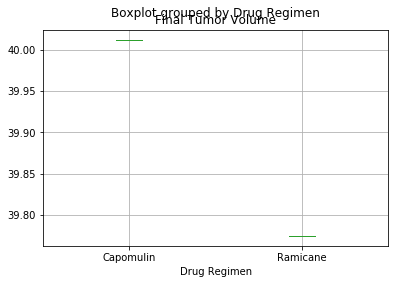

In [104]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

boxplot = tum_4.boxplot(column='Final Tumor Volume', by='Drug Regimen')

## Line and scatter plots

In [190]:
# Generate a line plot of timepoint versus average tumor volume for the Capomulin regimen
tum_line = mouse_merge_pd.loc[mouse_merge_pd['Drug Regimen'] == "Capomulin"][['Mouse ID','Drug Regimen','Timepoint','Tumor Volume (mm3)']]
tum_line_mean = tum_line.groupby(['Timepoint']).mean()
new_tum_line = tum_line_mean.reset_index() 
new_tum_line

,Timepoint,Tumor Volume (mm3)
0,0,45.000000
1,5,44.266086
2,10,43.084291
3,15,42.064317
4,20,40.716325
5,25,39.939528
6,30,38.769339
7,35,37.816839
8,40,36.958001
9,45,36.236114


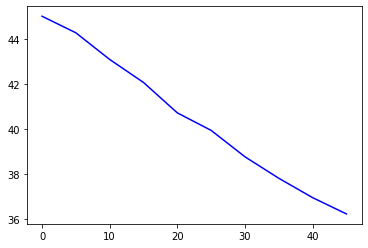

In [198]:
new_tum_index = new_tum_line.set_index("Timepoint") 
tum_plut, = plt.plot(tum_line_mean, color="blue", label="World Average" )

In [187]:
# new_tum_line.set_index('Timepoint')
# new_tum_line('Timepoint')['Tumor Volume (mm3)'].plot();

In [123]:
# tum_line_mean['Timepoint'] = pd.to_datetime(tum_line_mean['Timepoint'])

In [124]:
# line_cap_mean.set_index('Tumor Volume (mm3)')['Timepoint'].plot();

In [118]:
tum_line_mean.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10 entries, (Capomulin, 0) to (Capomulin, 45)
Data columns (total 1 columns):
Tumor Volume (mm3)    10 non-null float64
dtypes: float64(1)
memory usage: 327.0+ bytes


In [111]:
# plot data points over timepoint

In [172]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
tum_scat = mouse_merge_pd.loc[mouse_merge_pd['Drug Regimen'] == "Capomulin"][['Mouse ID','Drug Regimen','Weight (g)','Tumor Volume (mm3)']]
tum_scat_mean = tum_scat.groupby(['Weight (g)']).mean()
new_tum_scat = tum_scat_mean.reset_index() 

In [173]:
new_tum_line

,Weight (g),Tumor Volume (mm3)
0,15,36.182040
1,17,37.214133
2,19,41.182391
3,20,39.141053
4,21,42.088700
5,22,43.288490
6,23,43.341051
7,24,44.805810
8,25,44.062109


In [175]:
# ax = tum_line_mean.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', 
#                        color='DarkBlue', label='Group 1')

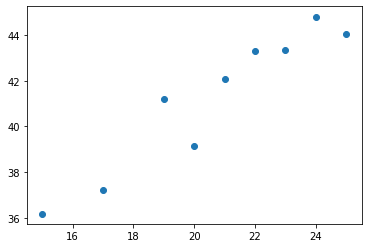

In [176]:
plt.scatter(new_tum_line['Weight (g)'],new_tum_line['Tumor Volume (mm3)'])
# clb = plt.colorbar()
# plt.xlabel("Latitude")
# plt.ylabel("Longitude")


In [151]:
tum_line_mean.dtypes

Tumor Volume (mm3)    float64
dtype: object

In [132]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen